<a href="https://colab.research.google.com/github/NicksonIndiani/CorrelacaoLinearSimples/blob/main/Correla%C3%A7%C3%A3oLinearSimples_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('Aprovacao_Alunos.xlsx')
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


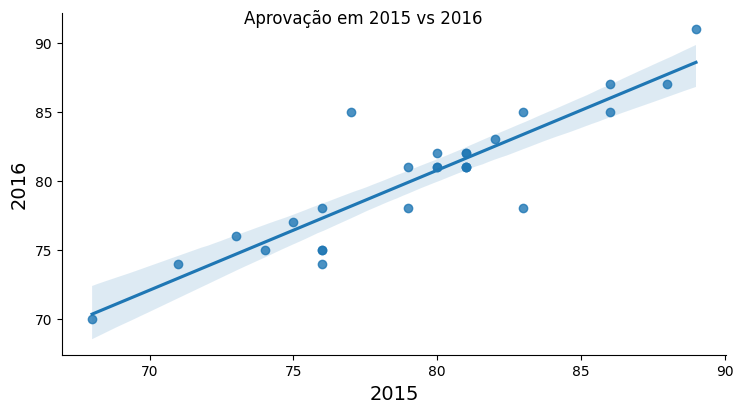

In [ ]:
from pandas.io.sql import DatabaseError

ax = sns.lmplot(x='ano_2015', y='ano_2016', data=df)
ax.fig.set_size_inches(8, 4)
ax.fig.suptitle('Aprovação em 2015 vs 2016')
ax.set_xlabels('2015', fontsize = 14)
ax.set_ylabels('2016', fontsize = 14)

In [ ]:
correlacao = df[['ano_2015', 'ano_2016']].corr()

In [ ]:
print(correlacao)

          ano_2015  ano_2016
ano_2015  1.000000  0.894957
ano_2016  0.894957  1.000000


In [ ]:
import statsmodels.api as sm

In [ ]:
Y = df.ano_2016
X = sm.add_constant(df.ano_2015)

In [ ]:
resultado_regressão = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressão.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           3.02e-10
Time:                        13:39:25   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
df["Y_Previsto"] = resultado_regressão.predict()
df.head()

,UF,ano_2015,ano_2016,Y_Previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [ ]:
df["Resíduo"] = df.Y_Previsto - df.ano_2016
df.head()

,UF,ano_2015,ano_2016,Y_Previsto,Resíduo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
